# Introduction to Text Analysis in Python

I am not an NLP person and this is outside of my expertise, but I know enough to give a basic introduction to text analysis and text processing tools.

For this tutorial + homework, I'm going to use data from Reddit. I'm getting it from PushShift, using the following code. You can run this yourself to get your own dataset (e.g., from different subreddits, or different dates). I'd recommend, however, just using the dataset that I created. I show how to import it below

In [3]:
import requests
from datetime import datetime
import time
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## Code used to create the dataset - no need to run this code

endpt = 'https://api.pushshift.io/reddit/search/submission' #database/api to acess redit things

subreddits = ['AskReddit','Coronavirus', 'politics']

# Start and end date (pushshift expects these in epoch time) change the typed out date to make it the days you want
start_date = int(datetime.strptime('2020-03-11', '%Y-%m-%d').timestamp())
end_date = int(datetime.strptime('2020-03-25', '%Y-%m-%d').timestamp())


def get_posts(subreddit, before = end_date, after = start_date, result = None,  min_comments = 20): #creates a dictuinary 
    params = {'subreddit': subreddit,
              'num_comments': f'>{min_comments}',
              'before': before,
              'size': 500
             }
    if result == None:
        result = []
    r = requests.get(endpt, params=params)
    print(r.url)
    print(datetime.fromtimestamp(before))
    for item in r.json()['data']:
        created_time = item['created_utc']
        if created_time < after: # If we've reached the earliest we want, then return
            print(len(result))
            return result
        else:
            try:
                result.append((item['title'],item['selftext'], created_time, subreddit))
            except KeyError:
                print(item)
    time.sleep(.5) #waits half a second before making a new call to be nice to the server. 
    return get_posts(subreddit, before = created_time, result = result) #if it all worked, do it all again. 


sr_data = [] #now this changes the things into a dataframe
for subreddit in subreddits:
    new_data = get_posts(subreddit)
    sr_data = sr_data + new_data
sr = pd.DataFrame(sr_data, columns = ['title', 'selftext', 'date', 'subreddit'])
sr.date = pd.to_datetime(sr.date, unit='s')
sr.to_csv('./sr_post_data.csv', index = False)

https://api.pushshift.io/reddit/search/submission?subreddit=AskReddit&num_comments=%3E20&before=1585108800&size=500
2020-03-25 00:00:00
https://api.pushshift.io/reddit/search/submission?subreddit=AskReddit&num_comments=%3E20&before=1585102981&size=500
2020-03-24 22:23:01
https://api.pushshift.io/reddit/search/submission?subreddit=AskReddit&num_comments=%3E20&before=1585095315&size=500
2020-03-24 20:15:15
https://api.pushshift.io/reddit/search/submission?subreddit=AskReddit&num_comments=%3E20&before=1585087281&size=500
2020-03-24 18:01:21
https://api.pushshift.io/reddit/search/submission?subreddit=AskReddit&num_comments=%3E20&before=1585079810&size=500
2020-03-24 15:56:50
https://api.pushshift.io/reddit/search/submission?subreddit=AskReddit&num_comments=%3E20&before=1585071406&size=500
2020-03-24 13:36:46
https://api.pushshift.io/reddit/search/submission?subreddit=AskReddit&num_comments=%3E20&before=1585061467&size=500
2020-03-24 10:51:07
https://api.pushshift.io/reddit/search/submissio

KeyboardInterrupt: 

In [15]:
## Code to download and import the file (DO run this code)
sr = pd.read_csv('https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/sr_post_data.csv?raw=true')

In [16]:
sr

,title,selftext,date,subreddit
0,What’s your least favorite color? Why?,NaN,2020-03-25 03:58:28,AskReddit
1,What was the reason for the last time you cried?,NaN,2020-03-25 03:57:58,AskReddit
2,What are songs that have to be played full bla...,NaN,2020-03-25 03:57:17,AskReddit
3,How to get rid of excessive amounts of anger a...,NaN,2020-03-25 03:55:50,AskReddit
4,What's your go to fantasy?,NaN,2020-03-25 03:51:49,AskReddit
...,...,...,...,...
33889,"Biden Prevails, Even as Voters Prefer Bernie’s...",NaN,2020-03-11 04:18:56,politics
33890,‘Hard to comprehend’: Sanders’ loss in Michiga...,NaN,2020-03-11 04:13:32,politics
33891,Biden victories leave Bernie speechless,NaN,2020-03-11 04:06:34,politics
33892,Bernie Sanders opens with lead in North Dakota,NaN,2020-03-11 04:04:27,politics


In [ ]:
# Change the date to a datetime, and put it in the index
sr.index = pd.to_datetime(sr.date)

In [5]:
sr.head()

,title,selftext,date,subreddit
date,,,,
2020-03-25 03:58:28,What’s your least favorite color? Why?,NaN,2020-03-25 03:58:28,AskReddit
2020-03-25 03:57:58,What was the reason for the last time you cried?,NaN,2020-03-25 03:57:58,AskReddit
2020-03-25 03:57:17,What are songs that have to be played full bla...,NaN,2020-03-25 03:57:17,AskReddit
2020-03-25 03:55:50,How to get rid of excessive amounts of anger a...,NaN,2020-03-25 03:55:50,AskReddit
2020-03-25 03:51:49,What's your go to fantasy?,NaN,2020-03-25 03:51:49,AskReddit


## Summarization

There are some simple ways to summarize text data that can be useful, without using any special NLP tools.


For example, it can be very interesting to see how the frequency of a term changes over time:

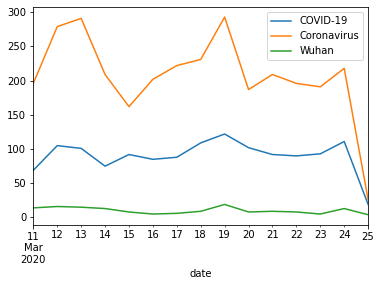

In [100]:
# This code plots the frequency of "COVID-19", "Coronavirus", and "Wuhan" each day

for term in ["COVID-19", "Coronavirus", "Wuhan"]:
    curr_df = sr.loc[sr.title.str.contains(term) | sr.selftext.str.contains(term)] #look for posts that have those terms and create new dataframe with the following content. 
    posts_per_day = curr_df.resample('D').size()
    posts_per_day.plot(label = term)

plt.legend() #adds the legend
plt.show() # prints the plot you programmed

#another option is to change the data into a dataframe and plot it using seaborn rather than plotting the content that you're pulling directly from the csv

### EXERCISE 1

Modify the code above to plot how often "Coronavirus" is used in each of the three subreddits over time

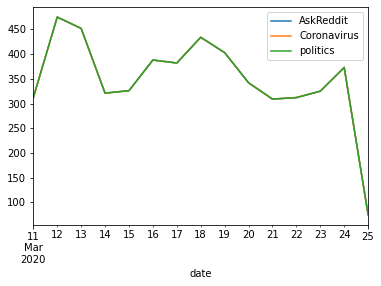

In [101]:
#### YOUR CODE HERE - each line should represent a subredit depicting how often the term coronavirus is used.


for subreddit in ['AskReddit','Coronavirus', 'politics']:
    curr_df = sr.loc[sr.title.str.contains("coronavirus") | sr.selftext.str.contains("coronavirus")] 
    posts_per_day = curr_df.resample('D').size()
    posts_per_day.plot(label = subreddit)

plt.legend() #adds the legend
plt.show() # prints the plot you programmed

## why aren't there different lines? I feel like there are people who talk about covid in the others... 

In [ ]:
# you have to define the subredits rather than theif just being a title 
subreddits = ['Askreddit', 'Coronavirus', 'politics']


curr_df = sr.loc[sr.title.str.contains("Coronavirus") | sr.selftext.str.contains("Coronavirus")]
for sub in subreddits:
    subposts = curr_df[curr_df.subreddit == sub]
    posts_per_day = subposts.resample('D').size()

plt.legend()
plt.show()

In [14]:
sr['num_posts'] = 1 # As in earlier visualization, just tells us each row represents 1 post

curr_df = sr.loc[sr.title.str.contains("Coronavirus") | sr.selftext.str.contains("Coronavirus")] #in loc, you have to use | for or and & for and
posts_per_day = curr_df.groupby([curr_df.index.day, curr_df.subreddit]).num_posts.sum().unstack().plot() #unstack turns it into a df

plt.legend()
plt.show()

NameError: name 'sr' is not defined

A similar approach is dictionary-based. The most well-known version of this is [LIWC](http://liwc.wpengine.com/), but the basic idea is that you create a set of words that are associated with a construct you are interested in, and you count how often they appear.

This is a very simple example of how you might do this to look for gendered words among our subreddits

In [13]:
# First we change NAs and removed/deleted to empty strings
sr.loc[(pd.isna(sr.selftext)) | (sr.selftext.isin(['[removed]', '[deleted]'])), 'selftext'] = ''
sr['all_text'] = sr.title + ' ' + sr.selftext

NameError: name 'sr' is not defined

In [13]:
sr.head()

,title,selftext,date,subreddit,all_text
date,,,,,
2020-03-25 03:58:28,What’s your least favorite color? Why?,,2020-03-25 03:58:28,AskReddit,What’s your least favorite color? Why?
2020-03-25 03:57:58,What was the reason for the last time you cried?,,2020-03-25 03:57:58,AskReddit,What was the reason for the last time you cried?
2020-03-25 03:57:17,What are songs that have to be played full bla...,,2020-03-25 03:57:17,AskReddit,What are songs that have to be played full bla...
2020-03-25 03:55:50,How to get rid of excessive amounts of anger a...,,2020-03-25 03:55:50,AskReddit,How to get rid of excessive amounts of anger a...
2020-03-25 03:51:49,What's your go to fantasy?,,2020-03-25 03:51:49,AskReddit,What's your go to fantasy?


In [12]:
sr.loc[sr.selftext != '', ["selftext", 'all_text']] # tests that the other things still exist

NameError: name 'sr' is not defined

In [105]:
male_words = ['he', 'his']
female_words = ['she', 'hers']

# This puts all of the text of each subreddit into lists
def string_to_list(x):
    return ' '.join(x).split() #turns text from a column into a jiant string and then makes a list
grouped_text = sr.groupby('subreddit').all_text.apply(string_to_list) #then careates a list of words in each subreddit

# Then, we count how often each type of words appears in each subreddit
agg = grouped_text.aggregate({'proportionMale': lambda x: sum([x.count(y) for y in male_words])/len(x),
                        'proportionFemale': lambda x: sum([x.count(y) for y in female_words])/len(x)} # sums number of desired words
                        )

In [18]:
agg

                  subreddit  
proportionMale    AskReddit      0.000858
                  Coronavirus    0.001704
                  politics       0.005122
proportionFemale  AskReddit      0.000199
                  Coronavirus    0.000253
                  politics       0.000126
Name: all_text, dtype: float64

### EXERCISE 2

One of the trickiest parts of analysis is getting the data in the form that you want it in order to analyze/visualize it. 

I think a good visualization for this would be a barplot showing how often male and female word types appear for each subreddit. I'll give you the final call to produce the plot:

`sns.barplot(x='subreddit', y='proportion', hue = 'word_gender', data = agg_df_long)`

Now, see if you can get the data in shape so that this code actually works! :)

*Hint: You'll want to use [wide to long](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html)*

In [106]:
## Example of how wide_to_long works (from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html)

import numpy as np
np.random.seed(0)

df = pd.DataFrame({'A(weekly)-2010': np.random.rand(3),
                   'A(weekly)-2011': np.random.rand(3),
                   'B(weekly)-2010': np.random.rand(3),
                   'B(weekly)-2011': np.random.rand(3),
                   'X' : np.random.randint(3, size=3)})
df['id'] = df.index
df 

,A(weekly)-2010,A(weekly)-2011,B(weekly)-2010,B(weekly)-2011,X,id
0,0.548814,0.544883,0.437587,0.383442,0,0
1,0.715189,0.423655,0.891773,0.791725,1,1
2,0.602763,0.645894,0.963663,0.528895,1,2


In [107]:
pd.wide_to_long(df, # The data
                # The prefixes for the data columns. These will become column names that hold data values.
                stubnames = ['A(weekly)', 'B(weekly)'], #prefixes for the data copumns 
                i='id',
                # j is what you want to call the prefix
                j='year',
                # sep is a string that it between the stubnames and the values which will go in j
                sep='-')

,,X,A(weekly),B(weekly)
id,year,,,
0,2010,0,0.548814,0.437587
1,2010,1,0.715189,0.891773
2,2010,1,0.602763,0.963663
0,2011,0,0.544883,0.383442
1,2011,1,0.423655,0.791725
2,2011,1,0.645894,0.528895


In [108]:
agg_df = agg.unstack(level=0)
agg_df = agg_df.reset_index()

agg_df

,subreddit,proportionMale,proportionFemale
0,AskReddit,0.000858,0.000199
1,Coronavirus,0.001704,0.000253
2,politics,0.005122,0.000126


In [109]:
## Exercise 2 Code
## This code will get the df ready for pd.wide_to_long (try printing agg_df after running these to see what it looks like)
agg_df = agg.unstack(level=0)
agg_df = agg_df.reset_index() # this prevents the index from leaving and 

### Your code here


agg_long = pd.wide_to_long(agg_df, 
                'proportion',  #wtl knows that the second thing is the prefix of the columns you are manipulating
                i= "subreddit", #new temparary index
                # j is what you want to call the prefix
                j='word_gender', #name of new colum
                suffix ='\\D+' #how it knows what to choose after the prefix as the vaiable in the new column
                )
agg_df_long = pd.DataFrame(agg_long).reset_index() #becuase the internet said this solved the problem of not recocnizing column names
agg_df_long

,subreddit,word_gender,proportion
0,AskReddit,Male,0.000858
1,Coronavirus,Male,0.001704
2,politics,Male,0.005122
3,AskReddit,Female,0.000199
4,Coronavirus,Female,0.000253
5,politics,Female,0.000126


<AxesSubplot:xlabel='subreddit', ylabel='proportion'>

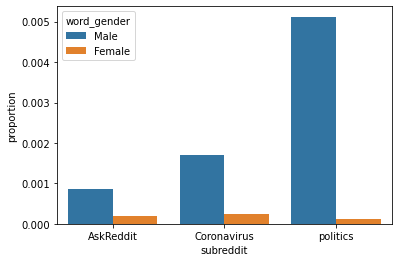

In [110]:
## Once you've created agg_df_long with the columns proportion and word_gender, you should be able to run this
sns.barplot(x='subreddit', y='proportion', hue = 'word_gender', data = agg_df_long)

### EXERCISE 3

Make your own analysis, with a different set of terms

In [111]:
thumbs_up = ['right', 'good', 'help']
thumbs_down = ['wrong', 'bad', 'hurt']

# This puts all of the text of each subreddit into lists
def string_to_list(x):
    return ' '.join(x).split() #turns text from a column into a jiant string and then makes a list
grouped_text = sr.groupby('subreddit').all_text.apply(string_to_list) #then careates a list of words in each subreddit

# Then, we count how often each type of words appears in each subreddit
agg_th = grouped_text.aggregate({'proportionUp': lambda x: sum([x.count(y) for y in thumbs_up])/len(x),
                        'proportionDown': lambda x: sum([x.count(y) for y in thumbs_down])/len(x)}) # sums number of desired words

agg_th

                subreddit  
proportionUp    AskReddit      0.003890
                Coronavirus    0.001601
                politics       0.001050
proportionDown  AskReddit      0.000848
                Coronavirus    0.000272
                politics       0.000417
Name: all_text, dtype: float64

In [17]:
#positive and negative feelings expressed in the different subreddits

thumbs_up = ['right', 'good', 'help']
thumbs_down = ['wrong', 'bad', 'hurt']

# This puts all of the text of each subreddit into lists
def string_to_list(x):
    return ' '.join(x).split() #turns text from a column into a jiant string and then makes a list
grouped_text = sr.groupby('subreddit').all_text.apply(string_to_list) #then careates a list of words in each subreddit

# Then, we count how often each type of words appears in each subreddit
agg_th = grouped_text.aggregate({'proportionUp': lambda x: sum([x.count(y) for y in thumbs_up])/len(x),
                        'proportionDown': lambda x: sum([x.count(y) for y in thumbs_down])/len(x)}) # sums number of desired words

agg_th

agg_th_n = agg_th.unstack(level=0)
agg_th_n = agg_th_n.reset_index()


agg_long_th = pd.wide_to_long(agg_th_n, # which data to use
                'proportion', #what variables you want to split
                i= "subreddit", # what you want to organize by
                j='thumb_type', # what to call the new collumn with the left over part of the data you're splitting
                suffix ='\\D+'# how to make it split at the word/string change
                )
agg_long_th_f = pd.DataFrame(agg_long_th).reset_index() #becuase the internet said this solved the problem of not recocnizing column names
agg_long_th_f

sns.barplot(x='subreddit', y='proportion', hue = 'thumb_type', data = agg_long_th_f)


AttributeError: 'DataFrameGroupBy' object has no attribute 'all_text'

In [10]:
sns.barplot(x='subreddit', y='proportion', hue = 'thumb_type', data = agg_long_th_f)

NameError: name 'agg_long_th_f' is not defined

## TF-IDF

There are more complicated approaches to summarization in Python, including using LIWC (see [here](https://pypi.org/project/liwc/)).

Almost all approaches are based on a "bag of words" approach, where the order of words is totally ignored. This is obviously a big simplification, but can often work quite well.

One thing we might want to do is to differentiate groups of texts based on how often words are used. The naive way is to just count how often words appear. However, the most common words will always appear first. So, computational linguists came up with "term frequency--inverse document frequency" (TF-IDF). This normalizes words based on how often they appear across groups of texts. A detailed explanation with code is [here](https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76).

There are a number of NLP / text analysis libraries in Python. The one I'm most familiar with is scikit-learn, which is a machine learning library. NLTK, SpaCy, and textblob are some of the most popular. Here is how to run TF-IDF in scikit-learn.

In [113]:
## First, we prepare the data for the TF-IDF tool.
# We want each subreddit to be represented by a list of strings.
# So, we take our grouped_text (which is a list of lists of words)
# and change it into a list of three really long strings, where each
# string is all the words that appeared for that subreddit.

# This called a 'list comprehension'
as_text = [' '.join(x) for x in grouped_text]

# It is equivalent to the following for loop
as_text = []
for x in grouped_text: # grouped by subreddit, so x is that
    as_text.append(' '.join(x))

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Just gets the 5000 most common words
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english') #stopwords are timy words we don't need to evaluate

tfidf_result = vectorizer.fit_transform(as_text) #all these things he coppied becuase he knew it worked, not how :) 
feature_names = vectorizer.get_feature_names()
dense = tfidf_result.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names).transpose()
df.columns = ['AskReddit','Coronavirus', 'politics']

In [115]:
# This shows the values with the highest TF-IDF for r/Coronavirus
df.sort_values('politics', ascending=False).head(20)

,AskReddit,Coronavirus,politics
coronavirus,0.075605,0.743420,0.688757
trump,0.061446,0.020280,0.542152
biden,0.018434,0.000934,0.188269
sanders,0.007480,0.000934,0.146084
says,0.007747,0.103134,0.122909
bernie,0.010686,0.000400,0.092442
pandemic,0.087092,0.062174,0.088536
joe,0.007747,0.001201,0.080203
president,0.026715,0.017345,0.076557
virus,0.088428,0.092060,0.066662


## Relative frequency


An even simpler approach that works pretty well when comparing just two "documents" is to rank how much more often a word appears in one rather than the other.


In [116]:
politics_str = ' '.join(sr.loc[sr.subreddit == 'politics', 'all_text']).lower()
covid_str = ' '.join(sr.loc[sr.subreddit == 'Coronavirus', 'all_text']).lower()
#goind to create two sets of proportions and subtract one from the other

In [117]:

def word_ratios(text):
    counts = {}
    tot_words = 0
    for word in text.split(): #splits the one long string into words, couls have gottent the length of text.split instead of the coutner method
        counts[word] = counts.get(word, 0) + 1
        tot_words +=1
    result = {}
    for word, count in counts.items():
        result[word] = count/tot_words
    return result
    
    
politics_ratio = word_ratios(politics_str)
covid_ratio = word_ratios(covid_str)

In [118]:
ratio_diff = [] #make a list of tuples of all the words and ratios of the words in both lists
for word in politics_ratio:
    if word in covid_ratio:
        ratio_diff.append((word, politics_ratio[word] - covid_ratio[word]))

In [119]:
ratio_diff = sorted(ratio_diff, key = lambda x: x[1]) # sort that list 

In [120]:
ratio_diff[:10] # look at first 10

[('in', -0.008641070668347078),
 ('of', -0.007505213147418767),
 ('cases', -0.006393400232430248),
 ('and', -0.005384970990780979),
 ('new', -0.00411425259549587),
 ('covid-19', -0.0034109876126995915),
 ('people', -0.002588033476289512),
 ('are', -0.0025514075823793616),
 ('italy', -0.0021828066878559604),
 ('the', -0.001945542159524638)]

In [121]:
ratio_diff[-10:] # look at last 10 

[('says', 0.002419674222273823),
 ('president', 0.0025352044372583355),
 ('he', 0.002684614473721106),
 ('his', 0.002724382128075578),
 ('joe', 0.00376115500185909),
 ('bernie', 0.004146683935294064),
 ('sanders', 0.005784627280288876),
 ('biden', 0.007175764471709353),
 ('coronavirus', 0.00810381716694909),
 ('trump', 0.01965779529726481)]

## Classification

Another commonly-used tool in NLP is classification. This is a "supervised machine learning" model, where you build a "training set" of items that are classified, and a machine learner uses that set to predict the classification of new items.

One very common example is sentiment. In sentiment analysis, a random set of texts is manually classified as positive, neutral, or negative. This set is then used to train a classifier to predict the sentiment of unseen texts.

It's beyond the scope of this class to learn how to do machine learning, but there are also pre-trained classifiers. One I found is from [textblob](https://textblob.readthedocs.io/en/dev/).

NLTK also has a pre-trained classifier, trained on social media data, called VADER. That is pretty similar to what we're looking at, so this example shows how to use it. Sentiment analyis 

NLTK is interesting - the core is installed in Anaconda, so you should have it. However, to get various pieces to work you need to install them. So, we need to start by installing the vader lexicon.

In [122]:
import nltk #sentiment analysis 
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Squid\AppData\Roaming\nltk_data...


True

In [123]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(sentence):
    vs = analyzer.polarity_scores(sentence)
    return vs['compound']

sr['sentiment'] = sr.all_text.apply(get_sentiment) #pandas lets you "apply" the function to all items in the list

KeyboardInterrupt: 

In [34]:
sr.sort_values('sentiment', ascending=False).head()

,title,selftext,date,subreddit,all_text,sentiment
date,,,,,,
2020-03-20 14:23:51,"I'm Ali Raja, MD and Shuhan He, MD emergency p...",We’re back again on the front lines of the COV...,2020-03-20 14:23:51,Coronavirus,"I'm Ali Raja, MD and Shuhan He, MD emergency p...",0.9899
2020-03-16 19:15:13,“Help with the fight against SARS-CoV-2 from h...,Hello all.\n\nI want to inform you of the work...,2020-03-16 19:15:13,Coronavirus,“Help with the fight against SARS-CoV-2 from h...,0.9661
2020-03-23 01:47:48,You die and are at the gates of heaven. You ha...,,2020-03-23 01:47:48,AskReddit,You die and are at the gates of heaven. You ha...,0.9657
2020-03-16 16:52:15,"The ""What happened in your state last week?"" M...",Welcome to the 'What happened in your state la...,2020-03-16 16:52:15,politics,"The ""What happened in your state last week?"" M...",0.9653
2020-03-23 17:08:02,"The ""What happened in your state last week?"" M...",Welcome to the 'What happened in your state la...,2020-03-23 17:08:02,politics,"The ""What happened in your state last week?"" M...",0.9653


## Topic Modeling

Finally, I'm going to show an example of topic modeling.

This is complicated, both mathematically and in code. I'm pulling this example from [my book chapter](https://communitydata.science/social-media-chapter/), which was itself based on [this example](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py).

The basic idea of topic modeling is that you are trying to optimize the likelihood of a set of distributions of words over topics and topics over documents based on the documents that actually exist. The idea is that each document can be seen as being generated by a mix of topics, and we try to find the set of topics that best matches. This works best on a large set of documents, which are themselves each quite large. Today we're making the mistake of using it on a small number of documents. I've made the opposite mistake before of using it on something like tweets. It works OK-ish in both of these circumstances, but it isn't ideal.

In [124]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import sys
import csv
import pandas as pd
import argparse

"""
This code was inspired/copied from http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html.

It takes in a list of documents and creates two outputs:
1. The documents together with their topic distribution and 
2. A set of topics and the top words associated with each.
"""


def run_lda(dataset, 
            n_topics = 10,     # How many topics to produce - is this a reasonable and meaningful number and meaningful list produced? play with the number to check 
            n_features = 20000 # How many different n-grams to consider (uses the most common)
           ):


    print("Loading dataset...")
    t0 = time()
    print("done in %0.3fs." % (time() - t0))

    # Use tf (raw term count) features for LDA.
    print("Extracting tf features for LDA...")
    tf_vectorizer = CountVectorizer(max_df=0.95, # Terms that show up in > max_df of documents are ignored
                                    #min_df=2, # Terms that show up in < min_df of documents are ignored
                                    max_features=n_features, # Only use the top max_features 
                                    stop_words='english',
                                    ngram_range=(1,2)) # all possible single- and double-word phrases 
    t0 = time()
    tf = tf_vectorizer.fit_transform(dataset)
    print("done in %0.3fs." % (time() - t0))


    print("Fitting LDA models with tf features, "
          "n_samples=%d and n_features=%d..."
          % (len(dataset), n_features))
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=2017,
                                    n_jobs=2)
    t0 = time()
    model = lda.fit(tf)
    transformed_model = lda.fit_transform(tf)
    print("done in %0.3fs." % (time() - t0))


    # Change the values into a probability distribution for each document
    topic_dist = [[topic/sum(topics) 
                   for topic in topics]
                          for topics in transformed_model]

    # Make the topic distribution into a dataframe
    td = pd.DataFrame(topic_dist)
    # Get the feature names (i.e., the words/terms)
    tf_feature_names = tf_vectorizer.get_feature_names()


    # Get the top words by topic
    topic_words = get_top_words(lda, tf_feature_names, 20)
    # Sort by how often topic is used
    topic_words = topic_words.reindex(sorted(topic_words.columns, 
                                             key = lambda x: td[x].sum(), 
                                             reverse=True),axis=1)

    # Rearrange the columns by how often each topic is used
    td = td.reindex(sorted(td.columns, 
                           key = lambda x: td[x].sum(), 
                           reverse=True),
                    axis=1)
    
    print('Topics by how common each topic is:')
    print(topic_words)
    print('Distributions of topic for each subreddit')
    print(td)
    


def get_top_words(model, feature_names, n_top_words):
    '''Takes the model, the words used, and the number of words requested.
    Returns a dataframe of the top n_top_words for each topic'''
    r = pd.DataFrame()
    # For each topic
    for i, topic in enumerate(model.components_):
        # Get the top feature names, and put them in that column
        r[i] = [add_quotes(feature_names[i])
                    for i in topic.argsort()[:-n_top_words - 1:-1]]
    return r

def add_quotes(s):
    '''Adds quotes around multiple term phrases'''
    if " " in s:
        s =  '"{}"'.format(s)
    return s

## Version 1

This version treats all of the text from a subreddit as a single document, and compares subreddits.

In [125]:
# Gets all of the strings for each subreddit and combines them into one long string for
# that subreddit
dataset = []
for s in grouped_text:
    dataset.append(' '.join(s))

# Takes that list of "documents" and runs LDA on it
run_lda(dataset)

Loading dataset...
done in 0.000s.
Extracting tf features for LDA...
done in 1.906s.
Fitting LDA models with tf features, n_samples=3 and n_features=20000...
done in 5.729s.
Topics by how common each topic is:
                         1                9                       8  \
0              "new cases"             song                  senate   
1   "positive coronavirus"  "people reddit"      "amid coronavirus"   
2                    india        redditors    "coronavirus crisis"   
3       "amid coronavirus"     "video game"  "positive coronavirus"   
4                    https         username                   fauci   
5                      nyc            girls                    poll   
6                    mayor        favourite                     sen   
7                   france             girl                 bailout   
8             "new deaths"             nsfw               mcconnell   
9                   county           sexual    "coronavirus relief"   
10       

## Version 2

This version tries to look at the range of topics from the Coronavirus subreddit. It takes all of the different posts from just the Coronavirus subreddit and treats each one as a document. In this case, the problem is that they are almost all short (they are typically headlines of articles that are shared).

In [126]:
dataset = sr.loc[sr.subreddit == 'Coronavirus', 'all_text']
run_lda(dataset)

Loading dataset...
done in 0.000s.
Extracting tf features for LDA...
done in 0.841s.
Fitting LDA models with tf features, n_samples=12654 and n_features=20000...
done in 79.933s.
Topics by how common each topic is:
                      2                       4            5            6  \
0                 cases             coronavirus  coronavirus  coronavirus   
1                    19                     000        china        masks   
2                 covid                positive        virus         help   
3            "covid 19"                pandemic        italy     hospital   
4                   new                  tested           uk     patients   
5           coronavirus                 testing       people      million   
6                deaths                   tests     lockdown         care   
7                people                    says       corona    hospitals   
8                 total                  health      chinese        fight   
9              

I think that this is quite a bit better and you can start to see some patterns and topics emerging.

### EXERCISE 4

Where topic modeling really shines is in analyzing longer texts - for example, the subreddit [changemyview](https://www.reddit.com/r/changemyview/) has fairly long posts where people explain a controversial view that they hold.

Try to figure out how to get a few hundred posts from changemyview, and run a topic model on them, where the selftext of each post is a document.

In [ ]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import sys
import csv
import pandas as pd
import argparse

"""
This code was inspired/copied from http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html.

It takes in a list of documents and creates two outputs:
1. The documents together with their topic distribution and 
2. A set of topics and the top words associated with each.
"""


def run_lda(dataset, 
            n_topics = 10,     # How many topics to produce - is this a reasonable and meaningful number and meaningful list produced? play with the number to check 
            n_features = 20000 # How many different n-grams to consider (uses the most common)
           ):


    print("Loading dataset...")
    t0 = time()
    print("done in %0.3fs." % (time() - t0))

    # Use tf (raw term count) features for LDA.
    print("Extracting tf features for LDA...")
    tf_vectorizer = CountVectorizer(max_df=0.95, # Terms that show up in > max_df of documents are ignored
                                    #min_df=2, # Terms that show up in < min_df of documents are ignored
                                    max_features=n_features, # Only use the top max_features 
                                    stop_words='english',
                                    ngram_range=(1,2)) # all possible single- and double-word phrases 
    t0 = time()
    tf = tf_vectorizer.fit_transform(dataset)
    print("done in %0.3fs." % (time() - t0))


    print("Fitting LDA models with tf features, "
          "n_samples=%d and n_features=%d..."
          % (len(dataset), n_features))
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=2017,
                                    n_jobs=2)
    t0 = time()
    model = lda.fit(tf)
    transformed_model = lda.fit_transform(tf)
    print("done in %0.3fs." % (time() - t0))


    # Change the values into a probability distribution for each document
    topic_dist = [[topic/sum(topics) 
                   for topic in topics]
                          for topics in transformed_model]

    # Make the topic distribution into a dataframe
    td = pd.DataFrame(topic_dist)
    # Get the feature names (i.e., the words/terms)
    tf_feature_names = tf_vectorizer.get_feature_names()


    # Get the top words by topic
    topic_words = get_top_words(lda, tf_feature_names, 20)
    # Sort by how often topic is used
    topic_words = topic_words.reindex(sorted(topic_words.columns, 
                                             key = lambda x: td[x].sum(), 
                                             reverse=True),axis=1)

    # Rearrange the columns by how often each topic is used
    td = td.reindex(sorted(td.columns, 
                           key = lambda x: td[x].sum(), 
                           reverse=True),
                    axis=1)
    
    print('Topics by how common each topic is:')
    print(topic_words)
    print('Distributions of topic for each subreddit')
    print(td)
    


def get_top_words(model, feature_names, n_top_words):
    '''Takes the model, the words used, and the number of words requested.
    Returns a dataframe of the top n_top_words for each topic'''
    r = pd.DataFrame()
    # For each topic
    for i, topic in enumerate(model.components_):
        # Get the top feature names, and put them in that column
        r[i] = [add_quotes(feature_names[i])
                    for i in topic.argsort()[:-n_top_words - 1:-1]]
    return r

def add_quotes(s):
    '''Adds quotes around multiple term phrases'''
    if " " in s:
        s =  '"{}"'.format(s)
    return s

In [128]:
#edit this one to get the posts from the subreddit
endpt = 'https://api.pushshift.io/reddit/search/submission' #database/api to acess redit things

subreddits = ['changemyview']

# Start and end date (pushshift expects these in epoch time) change the typed out date to make it the days you want
start_date = int(datetime.strptime('2020-05-20', '%Y-%m-%d').timestamp())
end_date = int(datetime.strptime('2020-05-27', '%Y-%m-%d').timestamp())


def get_posts(subreddit, before = end_date, after = start_date, result = None,  min_comments = 20): #creates a dictuinary 
    params = {'subreddit': subreddit,
              'num_comments': f'>{min_comments}',
              'before': before,
              'size': 200  # I said 200, but it pulled 333.... ??? 
             }
    if result == None:
        result = []
    r = requests.get(endpt, params=params)
    print(r.url)
    print(datetime.fromtimestamp(before))
    for item in r.json()['data']:
        created_time = item['created_utc']
        if created_time < after: # If we've reached the earliest we want, then return
            print(len(result))
            return result
        else:
            try:
                result.append((item['title'],item['selftext'], created_time, subreddit))
            except KeyError:
                print(item)
    time.sleep(.5) #waits half a second before making a new call to be nice to the server. 
    return get_posts(subreddit, before = created_time, result = result) #if it all worked, do it all again. 


sr_data = [] #now this changes the things into a dataframe
for subreddit in subreddits:
    new_data = get_posts(subreddit)
    sr_data = sr_data + new_data
sr = pd.DataFrame(sr_data, columns = ['title', 'selftext', 'date', 'subreddit'])
sr.date = pd.to_datetime(sr.date, unit='s')
sr.to_csv('./sr_post_data.csv', index = False)


https://api.pushshift.io/reddit/search/submission?subreddit=changemyview&num_comments=%3E20&before=1590552000&size=200
2020-05-27 00:00:00


AttributeError: 'builtin_function_or_method' object has no attribute 'sleep'

In [129]:

# then this

cmv = pd.read_csv('sr_post_data.csv')


In [130]:
# check your dataframe
#just type the name here and run
cmv

,title,selftext,date,subreddit
0,CMV: Firing someone for their behaviour off-du...,I hate bigots as much as the next person and u...,2020-05-27 03:56:31,changemyview
1,CMV: Automation is destroying life. Large corp...,People should avoid the idea of branded and pa...,2020-05-27 03:29:27,changemyview
2,CMV: you shouldn't vote blue no matter what,Actually you shouldn't vote a certain party no...,2020-05-27 03:10:53,changemyview
3,CMV: Major platforms for speech should not be ...,I am not talking about any particular topics o...,2020-05-27 03:01:27,changemyview
4,CMV: You can actually divide by 0,"Hello!\n\nThis is my first post here, i hope i...",2020-05-27 03:00:52,changemyview
...,...,...,...,...
328,CMV: Children should be taught to be more gene...,Bit of a mouthful but basically we as humans a...,2020-05-20 09:28:42,changemyview
329,CMV: Anyone who feels insulted when they're to...,I would like to have empathy for my fellow hum...,2020-05-20 06:16:53,changemyview
330,CMV: men are often preferred and hired because...,Important : I am not saying this happens 100% ...,2020-05-20 05:26:42,changemyview
331,CMV: Role theory doesn't make much sense; ther...,"When I have read about Role theory, I finally ...",2020-05-20 04:54:09,changemyview


In [131]:
# Change the date to a datetime, and put it in the index
cmv.index = pd.to_datetime(cmv.date)

In [132]:
#check it again
cmv.head()

,title,selftext,date,subreddit
date,,,,
2020-05-27 03:56:31,CMV: Firing someone for their behaviour off-du...,I hate bigots as much as the next person and u...,2020-05-27 03:56:31,changemyview
2020-05-27 03:29:27,CMV: Automation is destroying life. Large corp...,People should avoid the idea of branded and pa...,2020-05-27 03:29:27,changemyview
2020-05-27 03:10:53,CMV: you shouldn't vote blue no matter what,Actually you shouldn't vote a certain party no...,2020-05-27 03:10:53,changemyview
2020-05-27 03:01:27,CMV: Major platforms for speech should not be ...,I am not talking about any particular topics o...,2020-05-27 03:01:27,changemyview
2020-05-27 03:00:52,CMV: You can actually divide by 0,"Hello!\n\nThis is my first post here, i hope i...",2020-05-27 03:00:52,changemyview


In [133]:
#cmv.loc[(pd.isna(sr.selftext)) | (sr.selftext.isin(['[removed]', '[deleted]'])), 'selftext'] = '' - it ran an error with this one, but not without it... ? 
cmv['all_text'] = cmv.title + ' ' + cmv.selftext

In [134]:
# now edit this final one to get the topic model

dataset = cmv.loc[cmv.subreddit == 'changemyview', 'all_text']
run_lda(dataset) # find out where this is defined from Jeremy so you can copy it down! 

Loading dataset...
done in 0.000s.
Extracting tf features for LDA...
done in 0.359s.
Fitting LDA models with tf features, n_samples=333 and n_features=20000...
done in 3.928s.
Topics by how common each topic is:
          5                7                  1                 2  \
0    people           filler              china              peta   
1      just  "filler filler"               hong               tag   
2      like             ozai               kong           manhunt   
3       don             aang        "hong kong"            animal   
4     think           prayer              party           players   
5      life            bells             taiwan   "animal rights"   
6      time   "church bells"         protesters            people   
7      make             iroh            british             level   
8     women              don              opium            tagged   
9       way              amp  "communist party"             slots   
10     want       firebender 